# **ACADEMIC** **INTEGRITY**

"I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."

In [61]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
from tensorflow import keras
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
(trainX, train_labels), (testX, test_labels) = fashion_mnist.load_data()
# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [63]:
#Splitting the dataset into Input(Features) and Output(Labels)
'''dataset = fashion_mnist.load_data()
X = dataset[40000:]
Y = dataset[:20000]'''

In [69]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [70]:
trainX.shape

(60000, 28, 28)

In [72]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [73]:
testX.shape

(10000, 28, 28)

In [74]:
#Pre-processing
trainX, testX = trainX/255, testX/255

In [75]:
# one hot encode target values
trainY = to_categorical(trainy)
testY = to_categorical(testy)
#return trainX, trainy, testX, testy 

In [76]:
# scale pixels
	# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')


In [77]:
	# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

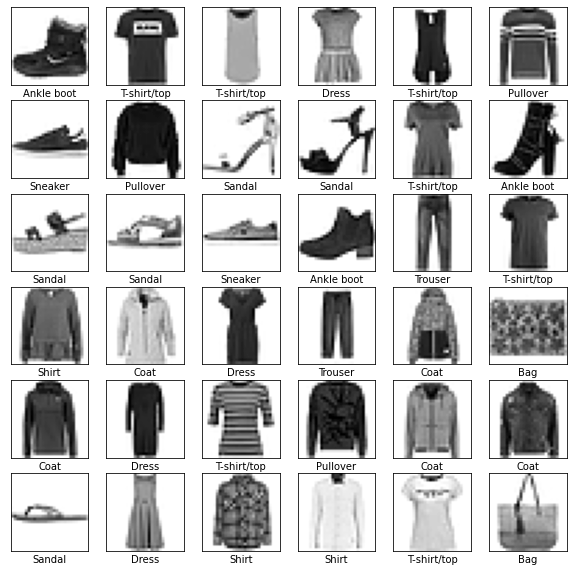

In [78]:
plt.figure(figsize=(10,10))
for k in range(36):
    plt.subplot(6,6,k+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid()
    plt.imshow(trainX[k], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[k]])
plt.show()

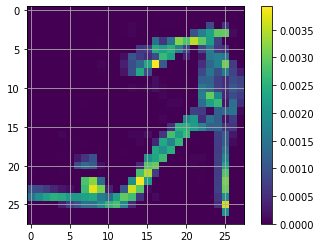

In [79]:
plt.figure()
plt.imshow(trainX[8])
plt.colorbar()
plt.grid(True)
plt.show()

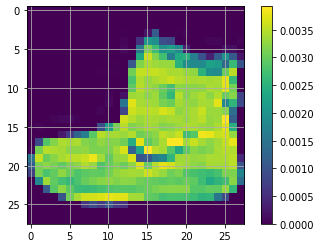

In [80]:
plt.figure()
plt.imshow(trainX[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [81]:
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [88]:
from keras.backend import dropout
#Building and Training the model
model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Dropout(0.2))
model_2.add(Flatten())
model_2.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
#model_2.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
#model_2.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model_2.add(Dense(10, activation='softmax'))


In [89]:
#Optimizing the model
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
)

In [ ]:
hist = model_2.fit (trainX ,trainy , epochs= 10)

In [92]:
X = model_2.evaluate(trainX,trainy)

  19/1875 [..............................] - ETA: 10s - loss: 0.2108 - accuracy: 0.9342

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 12s 6ms/step - loss: 0.2452 - accuracy: 0.9088


In [93]:
Y = model_2.evaluate(testX,testy)

  9/313 [..............................] - ETA: 2s - loss: 0.2485 - accuracy: 0.9271 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 2s 7ms/step - loss: 0.2990 - accuracy: 0.8904


In [ ]:
plt.plot(X)
plt.plot(Y)
plt.title('train Vs test acc')
plt.xlabel('train')
plt.ylabel('test')
plt.show()

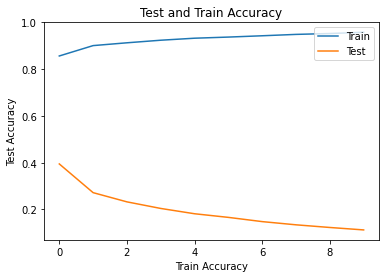

In [137]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('loss vs Accuracy')
plt.show()

In [ ]:
from keras.backend import dropout
#Building and Training the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1), padding='valid'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))



In [ ]:
#Optimizing the model
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
)

In [ ]:
hist_1 = model.fit (trainX ,trainy , epochs=10)

In [110]:
P = model.evaluate(trainX, trainy)

  18/1875 [..............................] - ETA: 11s - loss: 0.2932 - accuracy: 0.9028

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 11s 6ms/step - loss: 0.3080 - accuracy: 0.8882


In [111]:
Q = model.evaluate(testX, testy)

 16/313 [>.............................] - ETA: 2s - loss: 0.3031 - accuracy: 0.8906

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 2s 6ms/step - loss: 0.3478 - accuracy: 0.8763


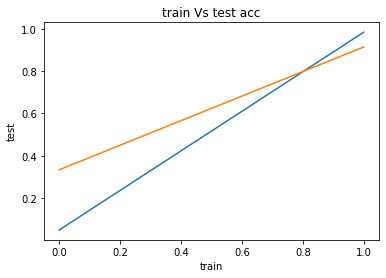

In [46]:
plt.plot(P)
plt.plot(Q)
plt.title('train Vs test acc')
plt.xlabel('train')
plt.ylabel('test')
plt.show()

In [36]:
plt.plot(hist_1.history['accuracy'])
plt.plot(hist_1.history['loss'])
plt.title('loss and Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

NameError: ignored

In [134]:
#Building and Training the model
from keras.backend import dropout
#Building and Training the model
model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_2.add(MaxPooling2D((2, 2)))

model_2.add(Dropout(0.2))
model_2.add(Flatten())
model_2.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model_2.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model_2.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model_2.add(Dense(10, activation='softmax'))

In [135]:
#Optimizing the model
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
)

In [ ]:
hist = model_2.fit (trainX ,trainy , epochs= 10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 41s 21ms/step - loss: 0.6846 - accuracy: 0.7433
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4430 - accuracy: 0.8398
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3884 - accuracy: 0.8596
Epoch 4/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3520 - accuracy: 0.8715
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3301 - accuracy: 0.8785
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3140 - accuracy: 0.8837
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2985 - accuracy: 0.8903
Epoch 8/10
1012/1875 [===============>..............] - ETA: 17s - loss: 0.2861 - accuracy: 0.8936

In [59]:
A = model_1.evaluate(trainX, trainy)

1875/1875 [==============================] - 11s 6ms/step - loss: 0.2569 - accuracy: 0.9037


In [60]:
B = model_1.evaluate(testX, testy)

313/313 [==============================] - 2s 6ms/step - loss: 0.3021 - accuracy: 0.8897


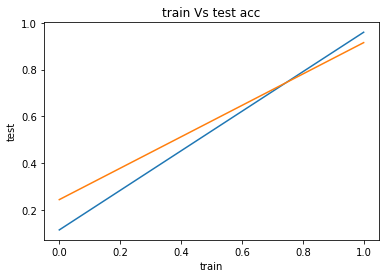

In [115]:
plt.plot(A)
plt.plot(B)
plt.title('train Vs test acc')
plt.xlabel('train')
plt.ylabel('test')
plt.show()

In [ ]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['loss'])
plt.title('Accuracy vs loss')
plt.legend(['Train', 'Test'])
plt.show()


# **PART4**




In [55]:
(train4, val4, test4), metadata = tfds.load(
    'fashion_mnist',
    split=['train[:70%]', 'train[70%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [58]:
num_classes = metadata.features['label'].num_classes

In [65]:
get_label_name = metadata.features['label'].int2str
image, label = next(iter(train_ds))

In [66]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [67]:
result = resize_and_rescale (image)

In [68]:
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

Min and max pixel values: 0.0 0.97728467


In [69]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])



In [70]:
# Add the image to a batch.
image = tf.cast(tf.expand_dims(image, 0), tf.float32)

In [71]:
aug4 = train4.map(
  lambda x, y: (resize_and_rescale(x, training=True), y))


In [72]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

In [81]:
def prepare(ds, shuffle=False, augment=False):
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)
  ds = ds.batch(batch_size)
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)
    
  return ds.prefetch(buffer_size=AUTOTUNE)


In [82]:
train4 = prepare(train4, shuffle=True, augment=True)
val4 = prepare(val4)
test4 = prepare(test4)


In [83]:
model = tf.keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [84]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
epochs=5
history = model.fit(
  train4,
  validation_data=val4,
  epochs=epochs
)

loss, acc = model.evaluate(test4)
print("Accuracy", acc)

Epoch 1/5
